# User-based EDA
The dataset used in the project is the 100,000 rating [MovieLens](https://grouplens.org/datasets/movielens/) dataset. The research group carrying the same name at the Computer Science and Engineering department - University of Minnisota, has been collecting the ratings since the 1990s. The dataset comes in several sizes, and the small dataset we use in this project is the subset recommended by the research group for development purposes. 

<br>

In this notebook we explore this dataset from the prespective of the movie fans, defined as "Users" in the dataset. We try to answer some questions such as:
- How many users produced the 100,000 ratings?
- How does the rating scale look like?
- How often did Users rate movies?
- Were Users generous with their ratings?
- Were there "heavy" raters? i.e., Users who rated large number of movies
- Were there Users with only one or few ratings? 
- How much variations did Users with their ratings?
- Any anomalies in the dataset? 

and many others. 

Let's start with loading the necessary packages:

In [1]:
import sys
import pandas as pd
from pandas_profiling import ProfileReport

import numpy as np
import warnings
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline


/Users/moh/NeueFische/recommender-system-capstone/recommender-system-capstone/.venv/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:

df_ratings = pd.read_csv('../data/small/ratings.csv')
df_movies= pd.read_csv('../data/small/movies.csv')
df_tags = pd.read_csv('../data/small/tags.csv')
df_links = pd.read_csv('../data/small/links.csv')

In [3]:
df_movies.head()
df_movies.shape
df_ratings.head()
df_ratings.shape
df_tags.head()
df_tags.shape
df_links.head()
df_links.shape

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


(9742, 3)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


(100836, 4)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


(3683, 4)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


(9742, 3)

Total number of movies that own IDs is 9742 movie. 

In [181]:
df_ratings.drop('timestamp', inplace=True, axis=1)
df_tags.drop('timestamp', inplace=True, axis=1)


In [182]:
df_ratings.movieId.nunique()

9724

Only 9724 movies have ratings. This mean that there are 18 movies in the dataset with no ratings. (9724 out of 9742)

In [183]:
df_ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


We try now to use the module ProfileReport to obtain basic statistical look into the dataframe df_ratings:

In [184]:
ProfileReport(df_ratings)

Summarize dataset:  57%|█████▋    | 8/14 [00:00<00:00, 34.86it/s, Calculate phi_k correlation]  /Users/moh/NeueFische/recommender-system-capstone/recommender-system-capstone/.venv/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/moh/NeueFische/recommender-system-capstone/recommender-system-capstone/.venv/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/moh/NeueFische/recommender-system-capstone/recommender-system-capstone/.venv/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in

From the ProfileReport we can find out that:
- Ratings range from 0.5 to 5. Mean Rating = 3.5 
- Mean number of ratings pro user = 166 
- Median ratings pro user = 71

In [185]:
df_user_ratings = df_ratings.groupby('userId').count().sort_values(by='rating', ascending = False).reset_index()
df_user_ratings.head(20)
df_user_ratings.tail()
df_user_ratings.head(305).tail()

,userId,movieId,rating
0,414,2698,2698
1,599,2478,2478
2,474,2108,2108
3,448,1864,1864
4,274,1346,1346
5,610,1302,1302
6,68,1260,1260
7,380,1218,1218
8,606,1115,1115
9,288,1055,1055


,userId,movieId,rating
605,442,20,20
606,569,20,20
607,320,20,20
608,576,20,20
609,53,20,20


,userId,movieId,rating
300,579,73,73
301,528,73,73
302,297,72,72
303,401,72,72
304,143,71,71


We observe that each user has rated at least 20 movies. 

<AxesSubplot:xlabel='rating', ylabel='Count'>

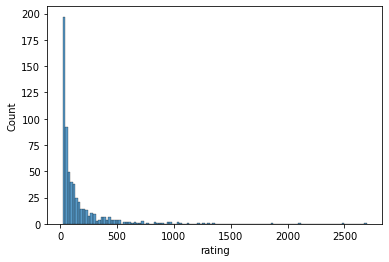

In [186]:
sns.histplot(data=df_user_ratings, x=df_user_ratings.rating, bins=120)


 Here we can clearly see that the most users rated a limited number of movies (median=71). Some extreme movie-viewers have rated more than a thousand films (11 users).  

[(0.0, 700.0)]

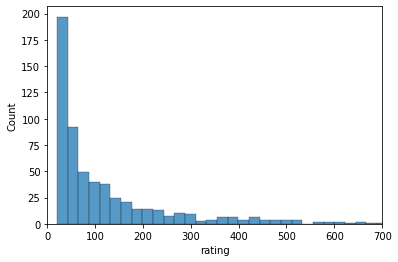

In [187]:
plot = sns.histplot(data=df_user_ratings, x=df_user_ratings.rating, bins=120)
plot.set(xlim=(0, 700))

Plotting the individual users with their corresponding rating count:

<AxesSubplot:xlabel='userId', ylabel='rating'>

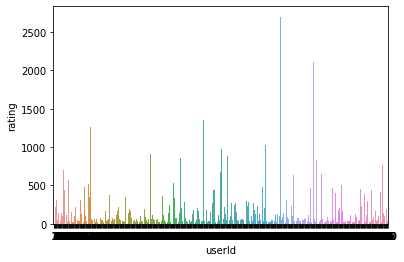

In [188]:

sns.barplot(data=df_user_ratings, x='userId', y ='rating' )

From the plot we can notice a couple of users who have posted more than 2000 ratings! There are 12 users with more than 1000 ratings. 

A histogram of the different ratings looks like this:

![image info](../images/ratings_hist.png)

The mean rating is 3.5. The most users give a rating of 4, followed by 3. The fewest users give rating under 2 (6%) 

How does the average rating per user look like? How far are they from the group rating's average? 
- Each user has already given at least 20 ratings, which allows to calculate an okey variance. The mean and standard deviation for each user will be calculated.

In [191]:
df_user_ratings_mean = df_ratings.groupby('userId').mean().sort_values(by='rating', ascending = False).reset_index()
df_user_ratings_std = df_ratings.groupby('userId').std().sort_values(by='rating', ascending = False).reset_index()

df_user_ratings_mean = df_user_ratings_mean.merge(df_user_ratings_std, on='userId')

df_user_ratings_mean.rename(columns={'rating_x':'rating_mean', 'rating_y':'rating_std'}, inplace=True)
df_user_ratings_mean.drop(['movieId_x', 'movieId_y'], inplace= True, axis=1)

df_user_ratings_mean.head(10)
df_user_ratings_mean.tail(10)


,userId,rating_mean,rating_std
0,53,5.000000,0.000000
1,251,4.869565,0.526942
2,515,4.846154,0.339683
3,25,4.807692,0.376216
4,30,4.735294,0.553711
5,523,4.693333,0.449424
6,348,4.672727,0.432672
7,171,4.634146,0.598603
8,452,4.556931,0.605100
9,43,4.552632,0.679564


,userId,rating_mean,rating_std
600,3,2.435897,2.090642
601,308,2.426087,1.498894
602,517,2.386250,1.347581
603,298,2.363685,1.082449
604,311,2.339286,1.262373
605,567,2.245455,1.221076
606,153,2.217877,1.431984
607,508,2.145833,1.057881
608,139,2.144330,0.894597
609,442,1.275000,0.697269


- It would be nice now to see how many movies these overly optimistic or pessmistic users already rated!

In [193]:
df_user_ratings.columns
df_red = df_user_ratings[['userId', 'rating']]
df_merge = df_user_ratings_mean.merge(df_red, on="userId")      
#df_user_ratings.head()      # Let's merge movie and rating 
df_merge.rename(columns={'rating':'rating_count'}, inplace=True)
#df_merge.rename(columns={'rating_x':'ratings_mean'}, inplace=True)
df_merge.head(20)
df_merge.tail()


Index(['userId', 'movieId', 'rating'], dtype='object')

,userId,rating_mean,rating_std,rating_count
0,53,5.000000,0.000000,20
1,251,4.869565,0.526942,23
2,515,4.846154,0.339683,26
3,25,4.807692,0.376216,26
4,30,4.735294,0.553711,34
5,523,4.693333,0.449424,75
6,348,4.672727,0.432672,55
7,171,4.634146,0.598603,82
8,452,4.556931,0.605100,202
9,43,4.552632,0.679564,114


,userId,rating_mean,rating_std,rating_count
605,567,2.245455,1.221076,385
606,153,2.217877,1.431984,179
607,508,2.145833,1.057881,24
608,139,2.144330,0.894597,194
609,442,1.275000,0.697269,20


Sort by ratings count to see the behaviour of the extreme users!

In [194]:
df_merge.head()

,userId,rating_mean,rating_std,rating_count
0,53,5.000000,0.000000,20
1,251,4.869565,0.526942,23
2,515,4.846154,0.339683,26
3,25,4.807692,0.376216,26
4,30,4.735294,0.553711,34


In [196]:
df_merge.sort_values(by='rating_count', ascending=False).head(10)
df_merge.sort_values(by='rating_count', ascending=False).tail(10)


,userId,rating_mean,rating_std,rating_count
444,414,3.391957,0.933307,2698
588,599,2.642050,0.815300,2478
437,474,3.398956,0.830847,2108
572,448,2.847371,1.029706,1864
509,274,3.235884,0.761703,1346
309,610,3.688556,0.857422,1302
510,68,3.233730,0.896740,1260
317,380,3.673235,0.961010,1218
322,606,3.657399,0.724121,1115
535,288,3.145972,0.866584,1055


,userId,rating_mean,rating_std,rating_count
520,257,3.200,1.005249,20
505,406,3.250,1.322876,20
451,147,3.375,1.440714,20
407,194,3.475,0.595487,20
388,320,3.525,0.785979,20
208,278,3.875,0.985086,20
148,569,4.000,0.725476,20
103,189,4.100,0.347926,20
69,595,4.200,0.833509,20
609,442,1.275,0.697269,20


Under the top ten frequent raters/reviewers, there are two who have below-average ratings_mean (2.6 and 2.8). 


Open Question: Are we allowed to normalize the ratings of the super-positive / super-negative users? (Those who have above average rating scores)

Topic-2: Movie-based Analysis

- Mean number of ratings pro movie = 10
- Median ratings pro movie = 3

<br>
we would like to sort movies by rating count:

In [197]:
df_grouped_movies = df_ratings.groupby('movieId').count().sort_values(by='userId', ascending=False)
df_grouped_movies.head(20)
df_grouped_movies.head(4862) # Median berechnen 

,userId,rating
movieId,,
356,329,329
318,317,317
296,307,307
593,279,279
2571,278,278
260,251,251
480,238,238
110,237,237
589,224,224


,userId,rating
movieId,,
356,329,329
318,317,317
296,307,307
593,279,279
2571,278,278
...,...,...
2554,3,3
691,3,3
893,3,3


<AxesSubplot:xlabel='rating', ylabel='Count'>

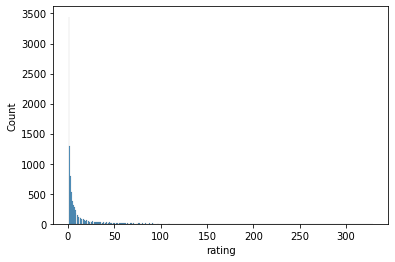

In [198]:
sns.histplot(data=df_grouped_movies, x='rating')

The Y (count) range is very high. It might be that a very large number of movies has only one rating. We try to make this clearer with the log scale:

<AxesSubplot:xlabel='rating', ylabel='Count'>

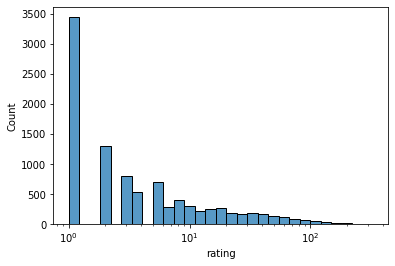

In [172]:
sns.histplot(data=df_grouped_movies, x='rating', log_scale=True)


- 3500 movies have indeed only one rating. Only three movies have more than 300 ratings. 
- Mean number of ratings per movie = 10

- Open Question: What should be done with the movies that have only one (or few) ratings? 

<br> Let's calculate the number of movies that have specific number of ratings


In [173]:
df_rating_count=df_grouped_movies.groupby('rating').count()
df_rating_count.head(20)

,userId
rating,
1,3446
2,1298
3,800
4,530
5,382
6,319
7,278
8,230
9,172


This dataframe would be useful to analyse a suitable cut-off number of ratings to be considered

Let's calculate the average rating for each film

In [174]:
df_ratings_gr_movie = df_ratings.groupby('movieId').mean()['rating'].reset_index()
df_ratings_gr_movie.sort_values(by='rating', inplace=True)

df_ratings_gr_movie2 = df_ratings.groupby('movieId').std()['rating'].reset_index()

df_ratings_gr_movie = df_ratings_gr_movie.merge(df_ratings_gr_movie2, on='movieId')
df_ratings_gr_movie.head(20)
df_ratings_gr_movie.rating_y.unique()
df_ratings_gr_movie.tail(20)
df_ratings_gr_movie.query('rating_x == 3.5')



,movieId,rating_x,rating_y
0,26696,0.5,NaN
1,3604,0.5,NaN
2,7312,0.5,NaN
3,145724,0.5,NaN
4,76030,0.5,NaN
5,145951,0.5,NaN
6,85334,0.5,NaN
7,129250,0.5,NaN
8,102025,0.5,NaN
9,175475,0.5,NaN


array([       nan, 0.        , 0.35355339, ..., 0.4472136 , 0.26726124,
       0.2236068 ])

,movieId,rating_x,rating_y
9704,162414,5.0,NaN
9705,162344,5.0,NaN
9706,31522,5.0,NaN
9707,7096,5.0,NaN
9708,124404,5.0,NaN
9709,124851,5.0,NaN
9710,159811,5.0,NaN
9711,3951,5.0,NaN
9712,3942,5.0,NaN
9713,126088,5.0,NaN


,movieId,rating_x,rating_y
5044,80834,3.5,NaN
5045,59810,3.5,NaN
5046,44788,3.5,0.447214
5047,25940,3.5,NaN
5048,58975,3.5,NaN
...,...,...,...
5951,7051,3.5,0.707107
5952,97923,3.5,0.901388
5953,140523,3.5,NaN
5954,8465,3.5,NaN


In [199]:
df_merge2 = df_ratings_gr_movie.merge(df_grouped_movies , on="movieId")  
df_merge2.rename(columns={'rating_x':'rating_mean', 'rating_y':'rating_std', 'rating':'rating_count'}, inplace=True)
df_merge2.drop('userId', inplace=True, axis=1)
df_merge2.head(20)
df_merge2.sample(10)

,movieId,rating_mean,rating_std,rating_count
0,26696,0.5,NaN,1
1,3604,0.5,NaN,1
2,7312,0.5,NaN,1
3,145724,0.5,NaN,1
4,76030,0.5,NaN,1
5,145951,0.5,NaN,1
6,85334,0.5,NaN,1
7,129250,0.5,NaN,1
8,102025,0.5,NaN,1
9,175475,0.5,NaN,1


,movieId,rating_mean,rating_std,rating_count
7480,5489,4.000000,NaN,1
7323,4033,3.923077,0.534094,13
6841,88129,3.765625,0.983611,32
7373,76093,3.943396,0.858556,53
7088,3088,3.833333,1.249242,12
8233,27708,4.000000,NaN,1
6816,3211,3.750000,0.353553,2
3519,57526,3.000000,NaN,1
1116,5246,2.125000,1.314978,4
7213,1844,3.875000,0.629153,4


,movieId,mean_rating,rating_count
9719,3851,5.0,1
9720,128087,5.0,1
9721,33138,5.0,1
9722,96608,5.0,1
9723,53355,5.0,1


<AxesSubplot:xlabel='mean_rating', ylabel='Count'>

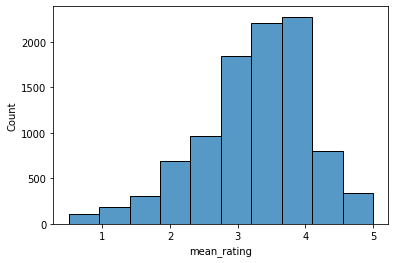

In [100]:
df_merge2.tail()
sns.histplot(data=df_merge2, x='mean_rating', bins=10)